In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Load data

In [3]:
df_2019 = pd.read_excel('q1-q4-2019-prescription-drugs-introduced-to-market.xlsx')

In [4]:
df_2020 = pd.read_excel('q1-q4-2020-prescription-drugs-introduced-to-market.xlsx')

In [5]:
df_2021 = pd.read_excel('q1-q3-2021-prescription-drugs-introduced-to-market.xlsx')

In [6]:
df_lastq = pd.read_excel('5-2-monthly-update-prescription-drugs-introduced-to-the-market-excel.xlsx')

In [7]:
df_2019.shape

(315, 30)

In [8]:
df_2020.shape

(278, 16)

In [9]:
df_2021.shape

(256, 16)

In [10]:
df_lastq.shape

(79, 16)

The 2019 dataset has more columns than the other three data sets. We can check and compare the columns of all datasets 

In [11]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Manufacturer Name                            315 non-null    object 
 1   NDC Number                                   315 non-null    int64  
 2   Drug Product Description                     315 non-null    object 
 3   Date Introduced to Market                    315 non-null    object 
 4   WAC at Introduction                          315 non-null    float64
 5   Marketing/Pricing Plan Description           119 non-null    object 
 6   Marketing/Pricing Plan Non-Public Indicator  197 non-null    object 
 7   Estimated Number of Patients                 189 non-null    object 
 8   Breakthrough Therapy Indicator               53 non-null     object 
 9   Priority Review Indicator                    81 non-null     float64
 10  Ac

In [12]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Manufacturer Name                            278 non-null    object 
 1   NDC Number                                   278 non-null    int64  
 2   Drug Product Description                     277 non-null    object 
 3   Date Introduced to Market                    278 non-null    object 
 4   WAC at Introduction                          278 non-null    float64
 5   Marketing/Pricing Plan Description           129 non-null    object 
 6   Marketing/Pricing Plan Non-Public Indicator  149 non-null    float64
 7   Estimated Number of Patients                 222 non-null    float64
 8   Breakthrough Therapy Indicator               44 non-null     float64
 9   Priority Review Indicator                    50 non-null     float64
 10  Ac

In [13]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Manufacturer Name                            256 non-null    object 
 1   NDC Number                                   256 non-null    int64  
 2   Drug Product Description                     256 non-null    object 
 3   Date Introduced to Market                    256 non-null    object 
 4   WAC at Introduction                          256 non-null    float64
 5   Marketing/Pricing Plan Description           159 non-null    object 
 6   Marketing/Pricing Plan Non-Public Indicator  97 non-null     float64
 7   Estimated Number of Patients                 244 non-null    float64
 8   Breakthrough Therapy Indicator               30 non-null     float64
 9   Priority Review Indicator                    59 non-null     float64
 10  Ac

In [14]:
df_lastq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Manufacturer Name                            79 non-null     object 
 1   NDC Number                                   79 non-null     int64  
 2   Drug Product Description                     79 non-null     object 
 3   Date Introduced to Market                    79 non-null     object 
 4   WAC at Introduction                          79 non-null     float64
 5   Marketing/Pricing Plan Description           33 non-null     object 
 6   Marketing/Pricing Plan Non-Public Indicator  46 non-null     float64
 7   Estimated Number of Patients                 72 non-null     float64
 8   Breakthrough Therapy Indicator               12 non-null     float64
 9   Priority Review Indicator                    27 non-null     float64
 10  Acqu

2019 dataset has extra columns that are not labeled. We can remove these columns

In [15]:
#drop columns 16-29
df_2019 = df_2019.drop(df_2019.iloc[:, 16:30], axis=1)

In [16]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Manufacturer Name                            315 non-null    object 
 1   NDC Number                                   315 non-null    int64  
 2   Drug Product Description                     315 non-null    object 
 3   Date Introduced to Market                    315 non-null    object 
 4   WAC at Introduction                          315 non-null    float64
 5   Marketing/Pricing Plan Description           119 non-null    object 
 6   Marketing/Pricing Plan Non-Public Indicator  197 non-null    object 
 7   Estimated Number of Patients                 189 non-null    object 
 8   Breakthrough Therapy Indicator               53 non-null     object 
 9   Priority Review Indicator                    81 non-null     float64
 10  Ac

Merge the data frames

In [17]:
df_list = [df_2019, df_2020, df_2021, df_lastq]

In [18]:
# merge the data from all files into one data frame
merged_df = df_list[0]
for i in range(1,4):
    merged_df = pd.concat([merged_df, df_list[i]])

Check the shape of the entire data set

In [19]:
merged_df.shape

(928, 16)

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 78
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Manufacturer Name                            928 non-null    object 
 1   NDC Number                                   928 non-null    int64  
 2   Drug Product Description                     927 non-null    object 
 3   Date Introduced to Market                    928 non-null    object 
 4   WAC at Introduction                          928 non-null    float64
 5   Marketing/Pricing Plan Description           440 non-null    object 
 6   Marketing/Pricing Plan Non-Public Indicator  489 non-null    object 
 7   Estimated Number of Patients                 727 non-null    object 
 8   Breakthrough Therapy Indicator               139 non-null    object 
 9   Priority Review Indicator                    217 non-null    float64
 10  Acq

### Rename columns 

In [21]:
merged_df.columns

Index(['Manufacturer Name', 'NDC Number', 'Drug Product Description',
       'Date Introduced to Market', 'WAC at Introduction',
       'Marketing/Pricing Plan Description',
       'Marketing/Pricing Plan Non-Public Indicator',
       'Estimated Number of Patients', 'Breakthrough Therapy Indicator',
       'Priority Review Indicator', 'Acquisition Date', 'Acquisition Price',
       'Acquisition Price Non-Public Indicator', 'Acquisition Price Comment',
       'General Comments', 'Supporting Documents'],
      dtype='object')

In [22]:
new_colnames =  {'Manufacturer Name': 'Manufacturer', 
                 'NDC Number':'NDC', 
                 'Drug Product Description': 'Drug',
                 'Date Introduced to Market':'Market_Date', 
                 'WAC at Introduction': 'WAC',
                 'Marketing/Pricing Plan Description': 'Market_Plan',
                 'Marketing/Pricing Plan Non-Public Indicator': 'Market_NP',
                 'Estimated Number of Patients': '#Patients', 
                 'Breakthrough Therapy Indicator': 'Breakthrough_Therapy',
                 'Priority Review Indicator': 'Priority_Review', 
                 'Acquisition Date': 'Acq_Date', 
                 'Acquisition Price':'Acq_Price',
                 'Acquisition Price Non-Public Indicator':'Acq_Price NP', 
                 'Acquisition Price Comment':'Acq_Price_Comment',
                 'General Comments':'Gen_com',
                 'Supporting Documents': 'Supp_Docs'
}

In [23]:
merged_df.rename(columns=new_colnames,
          inplace=True)

In [24]:
merged_df.head()

,Manufacturer,NDC,Drug,Market_Date,WAC,Market_Plan,Market_NP,#Patients,Breakthrough_Therapy,Priority_Review,Acq_Date,Acq_Price,Acq_Price NP,Acq_Price_Comment,Gen_com,Supp_Docs
0,SUN PHARMACEUTICALS,47335093640,"Leuprolide Acetate Injection 1Mg/0.2Ml, 2.8Ml",2019-03-01,705.67,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESTIMATED_PATIENTS: unknown to Sun; MARKETING_...,NaN
1,SUN PHARMACEUTICALS,47335023683,Ambrisentan 5 mg Tabs 30ct,2019-04-25,7500.00,This product is priced to reflect a discount o...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Estimated average of patients per month is unk...,NaN
2,SUN PHARMACEUTICALS,47335023783,Ambrisentan 10 mg Tabs 30ct,2019-04-25,7500.00,This product is priced to reflect a discount o...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Estimated average of patients per month is unk...,NaN
3,SUN PHARMACEUTICALS,47335003886,Bosentan Tablets 62.5mg 60ct,2019-06-14,6281.07,This product is priced to reflect a discount o...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Estimated average of patients per month is unk...,NaN
4,SUN PHARMACEUTICALS,47335003986,Bosentan Tablets 125mg 60ct,2019-06-14,6281.07,This product is priced to reflect a discount o...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Estimated average of patients per month is unk...,NaN


Check the values in the 'Breakthrough_Therapy' column

In [25]:
merged_df['Breakthrough_Therapy'].unique()

array([nan, '1',
       'When considering the price of INBRIJA one must consider that INBRIJA required over 20 years to develop, from the time the inhaled ARCUS technology was invented at MIT at the lab of Bob Langer. The ARCUS technology transforms molecules in a light, dry powder allowing delivery of an effective therapeutic dose of INBRIJA through the lungs. INBRIJA is a major innovation; it is one of only three pulmonary-delivered treatments approved for a non-pulmonary indication. The innovation of ARCUS – the dry powder inhalation system – allows for pulmonary delivery that bypasses the challenges that can be associated with oral levodopa that can lead to variability in absorption, contributing to OFF periods.',
       1.0], dtype=object)

In [26]:
# Remove the long string comment fron the column
merged_df = merged_df.loc[merged_df['Breakthrough_Therapy'] != 'When considering the price of INBRIJA one must consider that INBRIJA required over 20 years to develop, from the time the inhaled ARCUS technology was invented at MIT at the lab of Bob Langer. The ARCUS technology transforms molecules in a light, dry powder allowing delivery of an effective therapeutic dose of INBRIJA through the lungs. INBRIJA is a major innovation; it is one of only three pulmonary-delivered treatments approved for a non-pulmonary indication. The innovation of ARCUS – the dry powder inhalation system – allows for pulmonary delivery that bypasses the challenges that can be associated with oral levodopa that can lead to variability in absorption, contributing to OFF periods.']

In [27]:
merged_df['Breakthrough_Therapy'].unique()

array([nan, '1', 1.0], dtype=object)

Check the values in the other columns

In [28]:
merged_df['Priority_Review'].unique()

array([nan,  1.])

In [29]:
merged_df['Market_NP'].unique()

array(['1', nan, 1.0], dtype=object)

In [30]:
merged_df['Acq_Price NP'].unique()

array([nan,  1.])

In [31]:
merged_df['WAC'].unique()

array([7.056700e+02, 7.500000e+03, 6.281070e+03, 8.267100e+02,
       6.857000e+02, 1.371390e+03, 2.057090e+03, 2.481000e+03,
       6.445820e+03, 7.302010e+03, 2.036380e+03, 7.600800e+02,
       7.786000e+03, 1.875000e+05, 1.875000e+04, 1.450000e+02,
       2.914000e+02, 2.705000e+03, 2.453600e+03, 6.134000e+02,
       7.300000e+03, 4.895740e+03, 5.900000e+02, 8.850000e+02,
       1.512000e+04, 2.268000e+04, 1.008000e+04, 2.016000e+04,
       1.260000e+04, 9.992400e+02, 6.455820e+03, 7.045900e+02,
       1.148730e+04, 7.509900e+02, 1.501950e+03, 3.003840e+03,
       2.766810e+03, 7.112500e+02, 1.167750e+03, 1.326000e+03,
       2.262699e+04, 5.083260e+03, 1.524978e+04, 1.134600e+03,
       2.100510e+03, 1.675350e+03, 7.294700e+02, 1.209650e+03,
       3.024140e+03, 6.048270e+03, 1.209654e+04, 6.814480e+03,
       7.707680e+03, 8.455500e+02, 4.227750e+03, 2.021810e+03,
       2.189070e+03, 1.155000e+04, 1.152040e+03, 1.145990e+03,
       2.864970e+03, 5.729940e+03, 1.145988e+04, 1.7451

### Imputing missing values 

"Breakthrough_Therapy" indicates whether the drug was granted breakthrough therapy designation by the federal Food and Drug Administration prior to approval.  An indicator of 1 means that this drug was reviewed as such prior to approval.

"Priority_Preview" indicates whether the drug was granted priority review by the federal Food and Drug Administration prior to approval.  An indicator of 1 means that this drug was reviewed as such prior to approval. 

A manufacturer may limit the information reported to that which is otherwise in the public domain or publicly available. An indicator of 1 for Marketing/Pricing Plan Non-Public Indicator "Market_NP" or Acquisition Price Non-Public Indicator "Acq_Price NP" means that the information is not in the public domain or publicaly available.

Since missing values in these column indicate non-occurence, the missing values can be replaced by "0". 

In [32]:
cols = ['Breakthrough_Therapy', 'Priority_Review', 'Market_NP', 'Acq_Price NP']

In [33]:
merged_df[cols] = merged_df[cols].fillna(0).astype(int)

In [34]:
merged_df.head()

,Manufacturer,NDC,Drug,Market_Date,WAC,Market_Plan,Market_NP,#Patients,Breakthrough_Therapy,Priority_Review,Acq_Date,Acq_Price,Acq_Price NP,Acq_Price_Comment,Gen_com,Supp_Docs
0,SUN PHARMACEUTICALS,47335093640,"Leuprolide Acetate Injection 1Mg/0.2Ml, 2.8Ml",2019-03-01,705.67,NaN,1,NaN,0,0,NaN,NaN,0,NaN,ESTIMATED_PATIENTS: unknown to Sun; MARKETING_...,NaN
1,SUN PHARMACEUTICALS,47335023683,Ambrisentan 5 mg Tabs 30ct,2019-04-25,7500.00,This product is priced to reflect a discount o...,0,0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
2,SUN PHARMACEUTICALS,47335023783,Ambrisentan 10 mg Tabs 30ct,2019-04-25,7500.00,This product is priced to reflect a discount o...,0,0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
3,SUN PHARMACEUTICALS,47335003886,Bosentan Tablets 62.5mg 60ct,2019-06-14,6281.07,This product is priced to reflect a discount o...,0,0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
4,SUN PHARMACEUTICALS,47335003986,Bosentan Tablets 125mg 60ct,2019-06-14,6281.07,This product is priced to reflect a discount o...,0,0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN


There are missing values in the estimated number of patients "#Patients" column. It's important to look at the check  to make a decision on dealing with missing values.

In [35]:
#Since "#Patients" variable is the main explanatory variable. We do not want to impute missing 
#values despite the small dataset. Thus. we drop the missing values

price_df = merged_df[merged_df['#Patients'].notna()]

price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 1 to 78
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Manufacturer          726 non-null    object 
 1   NDC                   726 non-null    int64  
 2   Drug                  725 non-null    object 
 3   Market_Date           726 non-null    object 
 4   WAC                   726 non-null    float64
 5   Market_Plan           362 non-null    object 
 6   Market_NP             726 non-null    int64  
 7   #Patients             726 non-null    object 
 8   Breakthrough_Therapy  726 non-null    int64  
 9   Priority_Review       726 non-null    int64  
 10  Acq_Date              93 non-null     object 
 11  Acq_Price             64 non-null     float64
 12  Acq_Price NP          726 non-null    int64  
 13  Acq_Price_Comment     81 non-null     object 
 14  Gen_com               608 non-null    object 
 15  Supp_Docs             46

In [36]:
#Check the dtype of '#Patients'
price_df['#Patients'].dtypes

dtype('O')

In [37]:
#It looks the number of patients is  of type 'object'
price_df['#Patients'].unique()

array(['0', '70000', '3000', '75000', '1800', '1000000', '80000', '86000',
       '660', '101361', '5000', '900', '650', '1600', '1120', '145000',
       '375', '310', '720', '270', '345', '8400', '550', '613554', '2415',
       '1469', '1950', '590', '200', '5270', '52000', '187628', '108419',
       '1400000', '540000', '29011965', '179962', '40151', '12000', '800',
       '108', '3534', '1485', '320000', '43000', '700000', '2048',
       '2000000', '6000', '5240000', '344000', '150', '750', '2500',
       '197', '196', '380', '23360000', '1', '468000', '17300',
       '15000000', '500000', '7000', '11000', 0.0, 7250.0, 634211.0,
       1600000.0, 321.0, 3936.0, 31000000.0, 10200000.0, 3500000.0,
       6000000.0, 325000.0, 4500000.0, 650000.0, 26250.0, 315000.0,
       12800000.0, 1500000.0, 41.0, 1000000.0, 23401.0, 1556.0, 500000.0,
       274.0, 2946.0, 280000.0, 2700.0, 59000.0, 33000.0, 650.0,
       7500000.0, 20.0, 1700.0, 10000.0, 1100.0, 1300000.0, 4000.0,
       6300000.0,

The is an entry that is not a number but a long string comment that doesn't belong in this column. We can drop this row.

In [38]:
# Remove the long string comment fron the column
price_df = price_df.loc[price_df['#Patients'] != 'Acorda markets INBRIJA in the U.S. through our own specialty sales force. The marketing plan includes multiple comprehensive education and training initiatives, provided by our specialty sales force and account directors, for all stakeholders including health care practitioner (HCP) offices, patients, caregivers and Specialty Pharmacies. This includes training materials such as demonstration kits for HCP offices and specialty pharmacies and start kits for patients. People with Parkinson’s can suffer from cognitive challenges which make it very difficult for them to navigate the complex health insurance environment. Acorda has an active patient hub in place (Prescription Support Services) to assist patients in that health insurance navigation process to support access to INBRIJA. Our internal team of Regional Reimbursement Directors work directly with HCP offices on specific patient cases to help gain access through their insurance. Acorda offers a free sampling program to help patients and physicians evaluate effectiveness and tolerability, and a free drug Patient Assistance Program for uninsured patients with demonstrated financial hardship who satisfy eligibility criteria. Acorda provides co-pay assistance for commercially insured patients. INBRIJA is a specialty drug distributed through a closed network of specialty pharmacies under contract with Acorda.   o' ]

In [39]:
price_df['#Patients'].unique()

array(['0', '70000', '3000', '75000', '1800', '1000000', '80000', '86000',
       '660', '101361', '5000', '900', '650', '1600', '1120', '145000',
       '375', '310', '720', '270', '345', '8400', '550', '613554', '2415',
       '1469', '1950', '590', '200', '5270', '52000', '187628', '108419',
       '1400000', '540000', '29011965', '179962', '40151', '12000', '800',
       '108', '3534', '1485', '320000', '43000', '700000', '2048',
       '2000000', '6000', '5240000', '344000', '150', '750', '2500',
       '197', '196', '380', '23360000', '1', '468000', '17300',
       '15000000', '500000', '7000', '11000', 0.0, 7250.0, 634211.0,
       1600000.0, 321.0, 3936.0, 31000000.0, 10200000.0, 3500000.0,
       6000000.0, 325000.0, 4500000.0, 650000.0, 26250.0, 315000.0,
       12800000.0, 1500000.0, 41.0, 1000000.0, 23401.0, 1556.0, 500000.0,
       274.0, 2946.0, 280000.0, 2700.0, 59000.0, 33000.0, 650.0,
       7500000.0, 20.0, 1700.0, 10000.0, 1100.0, 1300000.0, 4000.0,
       6300000.0,

In [40]:
#Convert '#Patients' dtype to float
price_df['#Patients'] = price_df['#Patients'].astype(float)

In [41]:
#Check the unique values again
price_df['#Patients'].unique()

array([0.0000000e+00, 7.0000000e+04, 3.0000000e+03, 7.5000000e+04,
       1.8000000e+03, 1.0000000e+06, 8.0000000e+04, 8.6000000e+04,
       6.6000000e+02, 1.0136100e+05, 5.0000000e+03, 9.0000000e+02,
       6.5000000e+02, 1.6000000e+03, 1.1200000e+03, 1.4500000e+05,
       3.7500000e+02, 3.1000000e+02, 7.2000000e+02, 2.7000000e+02,
       3.4500000e+02, 8.4000000e+03, 5.5000000e+02, 6.1355400e+05,
       2.4150000e+03, 1.4690000e+03, 1.9500000e+03, 5.9000000e+02,
       2.0000000e+02, 5.2700000e+03, 5.2000000e+04, 1.8762800e+05,
       1.0841900e+05, 1.4000000e+06, 5.4000000e+05, 2.9011965e+07,
       1.7996200e+05, 4.0151000e+04, 1.2000000e+04, 8.0000000e+02,
       1.0800000e+02, 3.5340000e+03, 1.4850000e+03, 3.2000000e+05,
       4.3000000e+04, 7.0000000e+05, 2.0480000e+03, 2.0000000e+06,
       6.0000000e+03, 5.2400000e+06, 3.4400000e+05, 1.5000000e+02,
       7.5000000e+02, 2.5000000e+03, 1.9700000e+02, 1.9600000e+02,
       3.8000000e+02, 2.3360000e+07, 1.0000000e+00, 4.6800000e

In [42]:
price_df.head()

,Manufacturer,NDC,Drug,Market_Date,WAC,Market_Plan,Market_NP,#Patients,Breakthrough_Therapy,Priority_Review,Acq_Date,Acq_Price,Acq_Price NP,Acq_Price_Comment,Gen_com,Supp_Docs
1,SUN PHARMACEUTICALS,47335023683,Ambrisentan 5 mg Tabs 30ct,2019-04-25,7500.00,This product is priced to reflect a discount o...,0,0.0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
2,SUN PHARMACEUTICALS,47335023783,Ambrisentan 10 mg Tabs 30ct,2019-04-25,7500.00,This product is priced to reflect a discount o...,0,0.0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
3,SUN PHARMACEUTICALS,47335003886,Bosentan Tablets 62.5mg 60ct,2019-06-14,6281.07,This product is priced to reflect a discount o...,0,0.0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
4,SUN PHARMACEUTICALS,47335003986,Bosentan Tablets 125mg 60ct,2019-06-14,6281.07,This product is priced to reflect a discount o...,0,0.0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN
5,SUN PHARMACEUTICALS,63304073410,Esomeprazole 20mg DR Cap 1000ct,2019-05-15,826.71,This product is priced to reflect a discount o...,0,0.0,0,0,NaN,NaN,0,NaN,Estimated average of patients per month is unk...,NaN


In [43]:
#There are some entries with number of patients reported as 0. Check number of rows with zero patients reported
price_df[price_df['#Patients'] == 0].count()

Manufacturer            60
NDC                     60
Drug                    60
Market_Date             60
WAC                     60
Market_Plan             32
Market_NP               60
#Patients               60
Breakthrough_Therapy    60
Priority_Review         60
Acq_Date                 0
Acq_Price                7
Acq_Price NP            60
Acq_Price_Comment        0
Gen_com                 52
Supp_Docs                2
dtype: int64

In [44]:
#There are 60 entries with number of patients reported as 0. These should also be removed
price_df = price_df[price_df['#Patients'] != 0]

price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 15 to 78
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Manufacturer          666 non-null    object 
 1   NDC                   666 non-null    int64  
 2   Drug                  665 non-null    object 
 3   Market_Date           666 non-null    object 
 4   WAC                   666 non-null    float64
 5   Market_Plan           330 non-null    object 
 6   Market_NP             666 non-null    int64  
 7   #Patients             666 non-null    float64
 8   Breakthrough_Therapy  666 non-null    int64  
 9   Priority_Review       666 non-null    int64  
 10  Acq_Date              93 non-null     object 
 11  Acq_Price             57 non-null     float64
 12  Acq_Price NP          666 non-null    int64  
 13  Acq_Price_Comment     81 non-null     object 
 14  Gen_com               556 non-null    object 
 15  Supp_Docs             4

In [45]:
price_df = price_df[['Manufacturer', 'NDC', 'Drug','Market_Date', 'WAC', '#Patients', 'Breakthrough_Therapy','Priority_Review']]

In [46]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 15 to 78
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Manufacturer          666 non-null    object 
 1   NDC                   666 non-null    int64  
 2   Drug                  665 non-null    object 
 3   Market_Date           666 non-null    object 
 4   WAC                   666 non-null    float64
 5   #Patients             666 non-null    float64
 6   Breakthrough_Therapy  666 non-null    int64  
 7   Priority_Review       666 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 46.8+ KB


# Exploratory Data Analysis

In [47]:
price_df["Manufacturer"].value_counts()

Teva Pharmaceuticals USA          65
Dr. Reddy's Laboratories, Inc.    26
AveXis                            22
PureTek Corporation               21
Amneal Pharmaceuticals            21
                                  ..
Taiho Oncology, Inc.               1
Sunrise Pharmaceutical Inc.        1
SpecGx                             1
QBioMed Inc.                       1
Xeris Pharmaceuticals, INC.        1
Name: Manufacturer, Length: 165, dtype: int64

We can visualize the distribution of manufacturers.

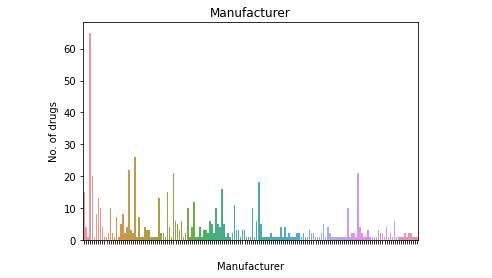

In [48]:
sns.countplot(x="Manufacturer", data= price_df);
plt.rcParams["figure.figsize"] = (12,8)
plt.title('Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('No. of drugs')
plt.xticks(color='w')
plt.show()

### Distribution of price

Wholesale Acquisition Cost(WAC) of the new presciption drug as of the introduction to market date.  It is the manufacturerís published list price for a prescription drug product with a unique NDC.  Reported in US currency, dollars.

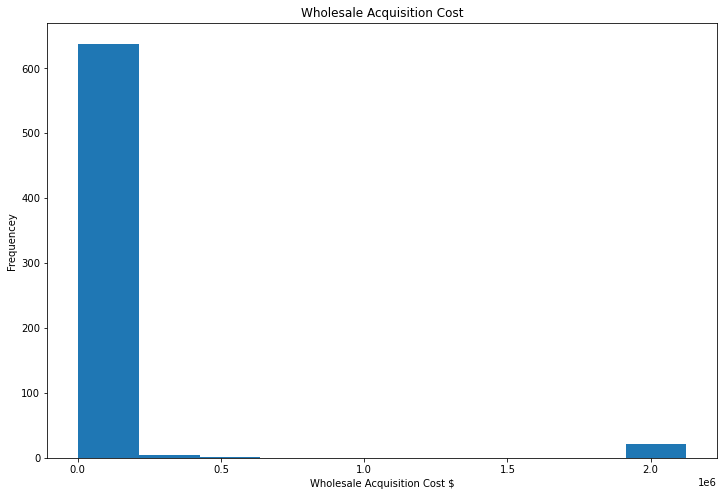

In [49]:
plt.hist(price_df['WAC'])
plt.title("Wholesale Acquisition Cost")
plt.xlabel("Wholesale Acquisition Cost $")
plt.ylabel("Frequencey")
plt.show()

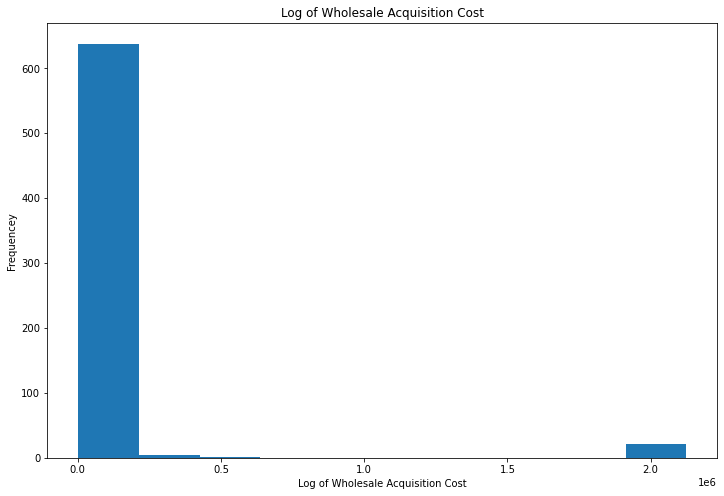

In [50]:
plt.hist(price_df['WAC'])
plt.title("Log of Wholesale Acquisition Cost")
plt.xlabel("Log of Wholesale Acquisition Cost")
plt.ylabel("Frequencey")
plt.show()

### Distribution of number of patients

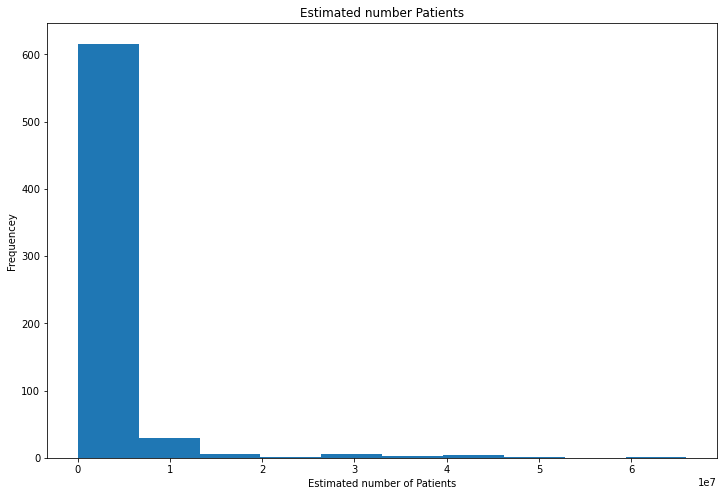

In [51]:
plt.hist(price_df['#Patients'])
plt.title("Estimated number Patients")
plt.xlabel("Estimated number of Patients")
plt.ylabel("Frequencey")
plt.show()

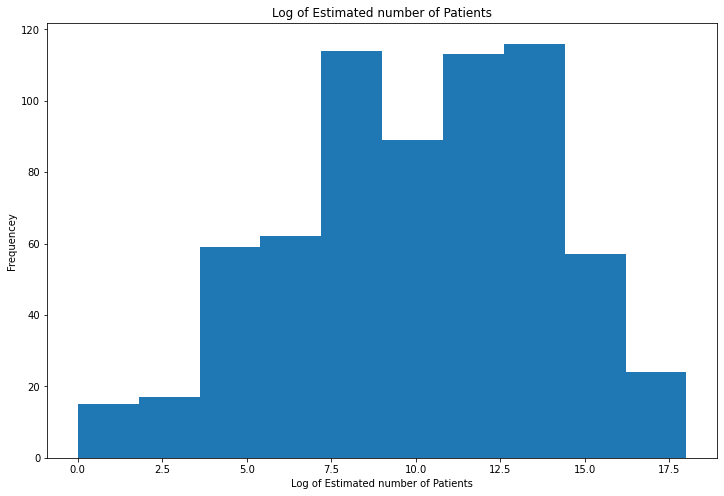

In [52]:
plt.hist(np.log(price_df['#Patients']))
plt.title("Log of Estimated number of Patients")
plt.xlabel("Log of Estimated number of Patients")
plt.ylabel("Frequencey")
plt.show()

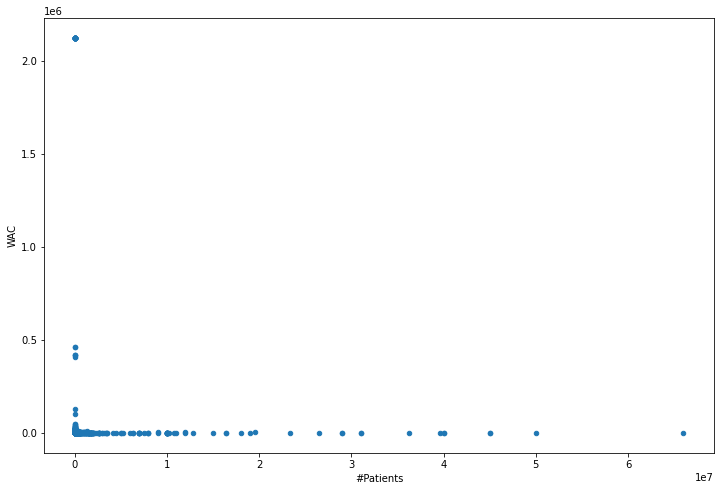

In [53]:
#Relationship between WAC and estimated #Patients
price_df.plot(y="WAC", x="#Patients", kind="scatter");

In [54]:
price_df['WAC'].max()

2125000.0

In [55]:
price_df = price_df[price_df['WAC'] < 40000.0]

In [56]:
price_df['WAC'].max()

39600.0

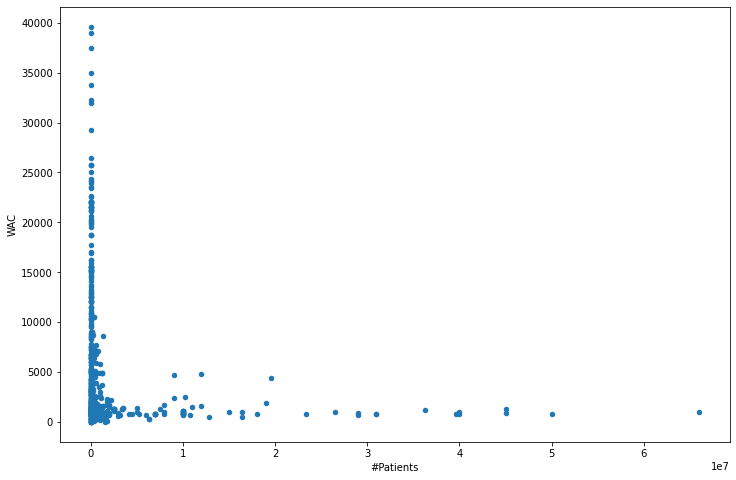

In [57]:
#Relationship between WAC and estimated #Patients
price_df.plot(y="WAC", x="#Patients", kind="scatter");

<AxesSubplot:xlabel='#Patients', ylabel='WAC'>

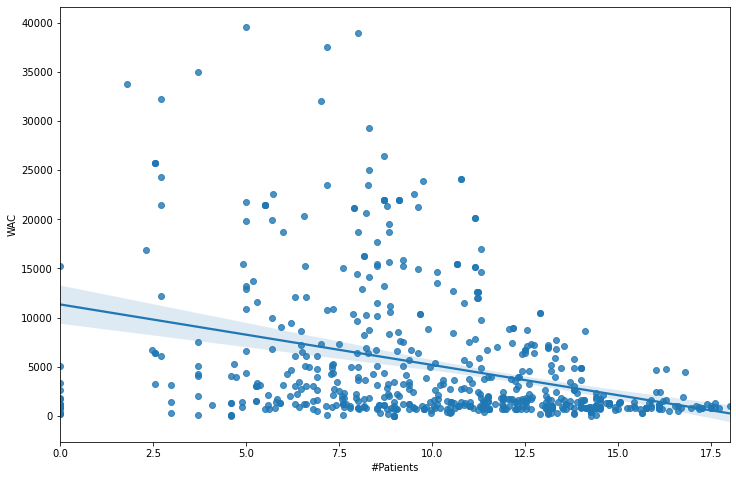

In [58]:
sns.regplot(y="WAC", x=np.log(price_df['#Patients']), data=price_df, fit_reg = True)

In [59]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 15 to 78
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Manufacturer          633 non-null    object 
 1   NDC                   633 non-null    int64  
 2   Drug                  632 non-null    object 
 3   Market_Date           633 non-null    object 
 4   WAC                   633 non-null    float64
 5   #Patients             633 non-null    float64
 6   Breakthrough_Therapy  633 non-null    int64  
 7   Priority_Review       633 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 44.5+ KB


In [60]:
df = price_df[['WAC', '#Patients', 'Breakthrough_Therapy','Priority_Review']]

In [61]:
df['Inverse_Patients'] = df['#Patients'].apply(lambda x: 1/x)

In [62]:
df.head()

,WAC,#Patients,Breakthrough_Therapy,Priority_Review,Inverse_Patients
15,7786.0,70000.0,0,0,0.000014
17,18750.0,3000.0,0,0,0.000333
21,2453.6,75000.0,0,0,0.000013
22,613.4,75000.0,0,0,0.000013
23,7300.0,1800.0,0,1,0.000556


<AxesSubplot:xlabel='Inverse_Patients', ylabel='WAC'>

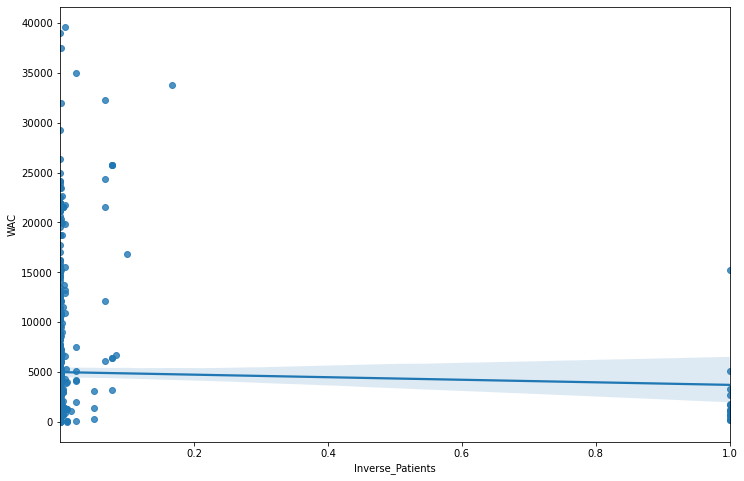

In [63]:
sns.regplot(y="WAC", x=df["Inverse_Patients"], data=df, fit_reg = True)

<AxesSubplot:xlabel='Inverse_Patients', ylabel='WAC'>

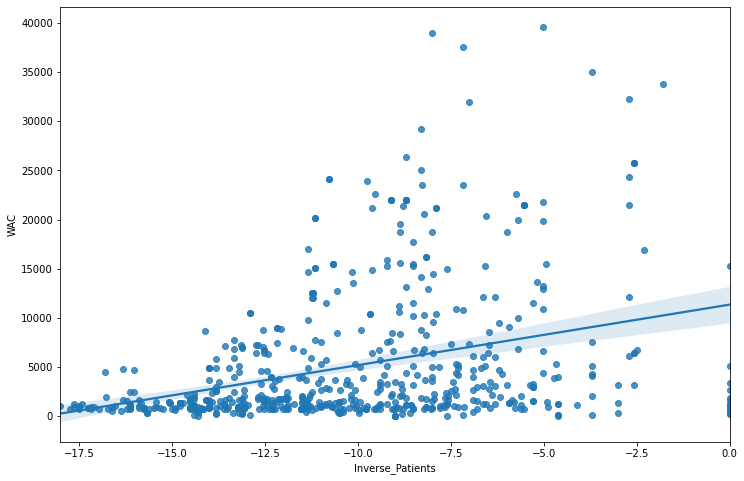

In [64]:
sns.regplot(y="WAC", x=np.log(df["Inverse_Patients"]), data=df, fit_reg = True)

In [65]:
df['Inverse_PatientsSq'] = df['#Patients'].apply(lambda x: 1/(np.square(x)))

<AxesSubplot:xlabel='Inverse_PatientsSq', ylabel='WAC'>

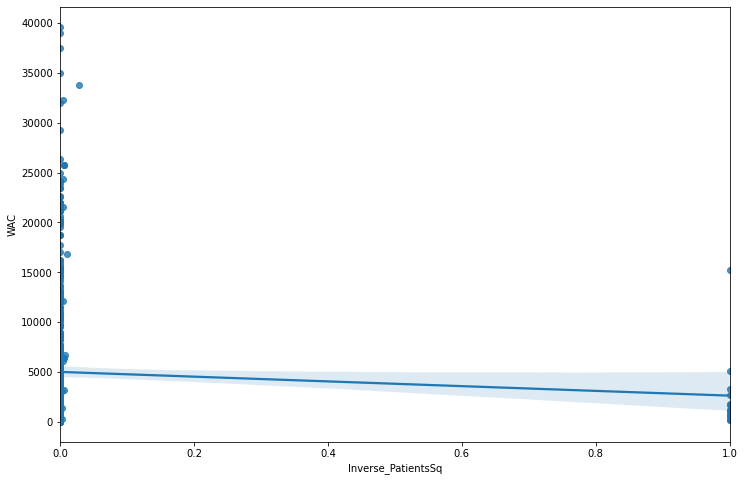

In [66]:
sns.regplot(y="WAC", x=df["Inverse_PatientsSq"], data=df, fit_reg = True)

<AxesSubplot:xlabel='Inverse_PatientsSq', ylabel='WAC'>

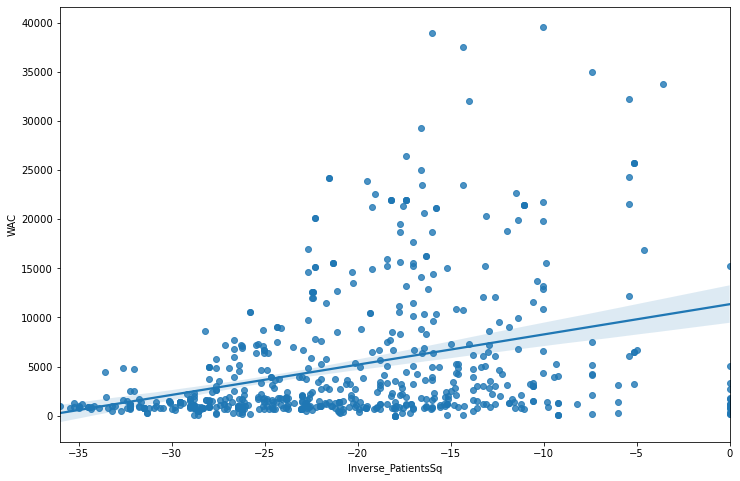

In [67]:
sns.regplot(y="WAC", x=np.log(df["Inverse_PatientsSq"]), data=df, fit_reg = True)

# Models

In [68]:
price_df.head()

,Manufacturer,NDC,Drug,Market_Date,WAC,#Patients,Breakthrough_Therapy,Priority_Review
15,Pfizer,409111201,Busulfan Injection 60 mg/10mL (6mg/mL),2019-02-28,7786.0,70000.0,0,0
17,Pfizer,69873030,VYNDAMAX™ 61MG CAP 3X10 BLST US,2019-08-27,18750.0,3000.0,0,0
21,Pfizer,69034201,ZIRABEV™ 400MG/16ML SSOL 1x1 GVL US,2019-12-31,2453.6,75000.0,0,0
22,Pfizer,69031501,ZIRABEV™ 100MG/4ML SSOL 1X1 GVL US,2019-12-31,613.4,75000.0,0,0
23,Sanofi,5846802271,Cablivi (caplacizumab-yhdp),2019-04-02,7300.0,1800.0,0,1


In [72]:
fdf = price_df[['WAC', '#Patients', 'Breakthrough_Therapy','Priority_Review']]

In [69]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [73]:
from sklearn.linear_model import LinearRegression
X = fdf.drop('WAC', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [74]:
lm.fit(X, fdf.WAC)

LinearRegression()

In [75]:
lm.coef_

array([-1.50763734e-04,  2.20291187e+03,  5.44227975e+03])

In [76]:
lm.intercept_

3856.649812637868

In [78]:
lm.predict(X)

array([ 3846.09635126,  3856.19752144,  3845.34253259,  3845.34253259,
        9298.65818782,  3705.88607873,  3844.58871392,  3843.68413152,
        3856.55030857,  3841.3682498 ,  3841.3682498 ,  3841.3682498 ,
        3841.3682498 ,  9298.17574387,  3856.51412528,  3856.51412528,
        3856.51412528,  9298.83156611,  9298.68834056,  3856.48095726,
        3834.78907122,  3834.78907122,  9298.87302614,  9298.87302614,
        9298.88282578,  3856.54126275,  3856.54126275,  3856.60910643,
        3856.60910643,  3856.59779915,  3855.38339727,  3856.56689258,
        3856.56689258,  3856.56689258,  3856.56689258,  3764.14812064,
        3764.14812064,  3856.28571822,  3856.42834071,  3856.35582336,
        3856.56086203,  9298.89940979,  9298.13503766,  3848.81009847,
        3848.81009847,  3848.81009847,  3848.81009847,  3828.36231477,
        3840.30415937,  9087.86033506,  9087.86033506,  9087.86033506,
        3775.23739633,  3775.23739633,  3775.23739633,  9298.13503766,
      

In [77]:
# first five predicted prices
lm.predict(X)[0:5]

array([3846.09635126, 3856.19752144, 3845.34253259, 3845.34253259,
       9298.65818782])

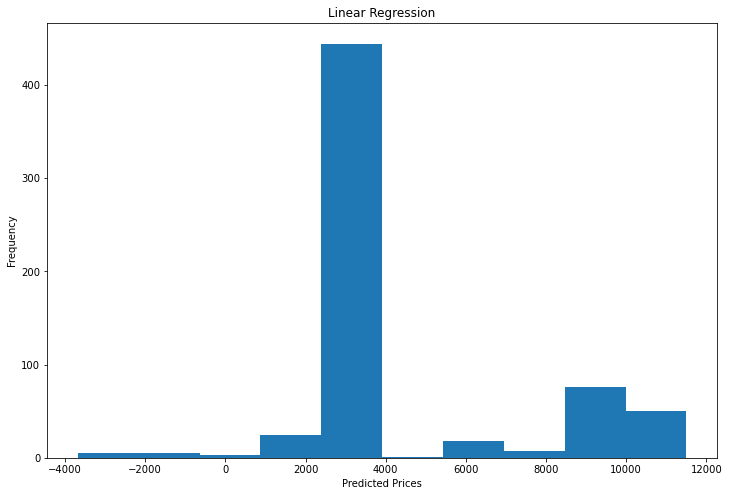

In [79]:
plt.hist(lm.predict(X))
plt.title("Linear Regression")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Relationship between Predicted Price and Original Price')

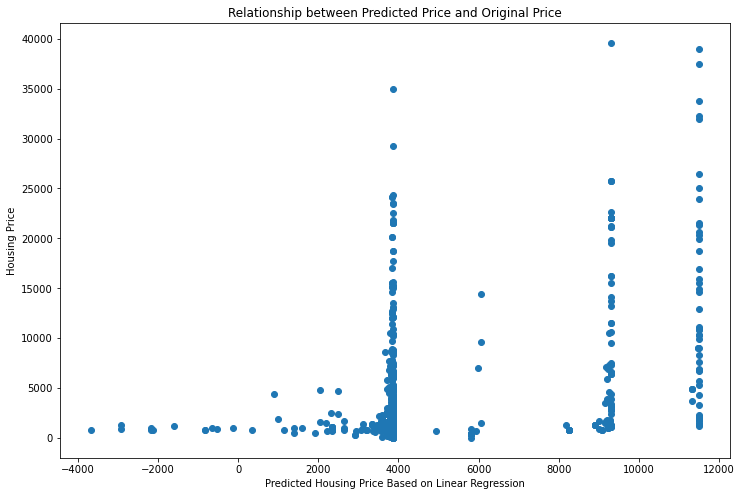

In [80]:
plt.scatter(lm.predict(X), fdf.WAC)
plt.xlabel("Predicted Housing Price Based on Linear Regression")
plt.ylabel("Housing Price")
plt.title("Relationship between Predicted Price and Original Price")

In [81]:
#RSS
print(np.sum((fdf.WAC - lm.predict(X)) ** 2))

24401962538.78852


In [83]:
#ESS
print(np.sum(lm.predict(X) - np.mean(fdf.WAC)) ** 2)

4.628108614458692e-19


In [85]:
print('Estimated intercept coefficient: ', round(lm.intercept_, 3))
print('Number of coefficients: ', len(lm.coef_))

Estimated intercept coefficient:  3856.65
Number of coefficients:  3


In [86]:
r2 = lm.score(X, fdf.WAC)
print("R-squared: ",r2)

R-squared:  0.1707994891771758


# MODEL 2